### Traffic sign Recognition
#Team Memebers
#Raghavendra C0851724
#Jebin George - C0850509
#Shravan Kumar Reddy - C0833124
#Nikeshh Vijayabaskaran - C0849544

In [1]:
pip install tensorflow keras sklearn matplotlib pandas pil

ERROR: Could not find a version that satisfies the requirement pil (from versions: none)
ERROR: No matching distribution found for pil
You should consider upgrading via the 'c:\users\raghu\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [2]:
pip install --upgrade pip


  Using cached pip-23.0.1-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 21.1.1
    Uninstalling pip-21.1.1:
      Successfully uninstalled pip-21.1.1


In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install opencv-python

     ---------------------------------------- 0.0/38.2 MB ? eta -:--:--
     ---------------------------------------- 0.2/38.2 MB 4.6 MB/s eta 0:00:09
     ---------------------------------------- 0.3/38.2 MB 3.8 MB/s eta 0:00:10
     ---------------------------------------- 0.4/38.2 MB 3.4 MB/s eta 0:00:11
      --------------------------------------- 0.7/38.2 MB 4.1 MB/s eta 0:00:10
     - -------------------------------------- 1.0/38.2 MB 4.4 MB/s eta 0:00:09
     - -------------------------------------- 1.2/38.2 MB 4.4 MB/s eta 0:00:09
     - -------------------------------------- 1.4/38.2 MB 4.5 MB/s eta 0:00:09
     - -------------------------------------- 1.6/38.2 MB 4.5 MB/s eta 0:00:09
     - -------------------------------------- 1.9/38.2 MB 4.4 MB/s eta 0:00:09
     -- ------------------------------------- 2.0/38.2 MB 4.2 MB/s eta 0:00:09
     -- ------------------------------------- 2.2/38.2 MB 4.4 MB/s eta 0:00:09
     -- ------------------------------------- 2.3/38.2 MB 4

In [32]:
#Importing all  necessary Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [33]:
# Loading Dataset
# List to store image data
list_data = []
# List to store image labels (classes)
list_labels = []
# Number of classes
Noclasses = 43
# Current path of the dataset
currentpath = './'

In [34]:
#Loops 43 classes starting from 0 to 42
for i in range(Noclasses):
    #Passing Path of each image
    path = os.path.join(currentpath, 'train', str(i))
    images = os.listdir(path)
    #Loops between each image
    for a in images:
        #Exceptional Handlings
        try:
            #Open image
            image = Image.open(path + '/' + a)
            #(Image)Resizes to 30x30
            image = image.resize((30, 30))
            #Conversion of image into an array
            image = np.array(image)
            # Append the image to "data" list
            list_data.append(image)
            # Append the label to list
            list_labels.append(i)
        #error message
        except:
            print('Error loading images!')
#Lists into array
list_data = np.array(list_data)
list_labels = np.array(list_labels)
#Shape of images and labels lists
#Around 39K images of size 30*30 and data contains RGB Value
print(list_data.shape, list_labels.shape)

(39209, 30, 30, 3) (39209,)


In [35]:
#Splitting dataset into train and test (80:20)
X_train, X_test, y_train, y_test = train_test_split(list_data, list_labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [36]:
#Converting labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

Text(0, 0.5, 'Number of images')

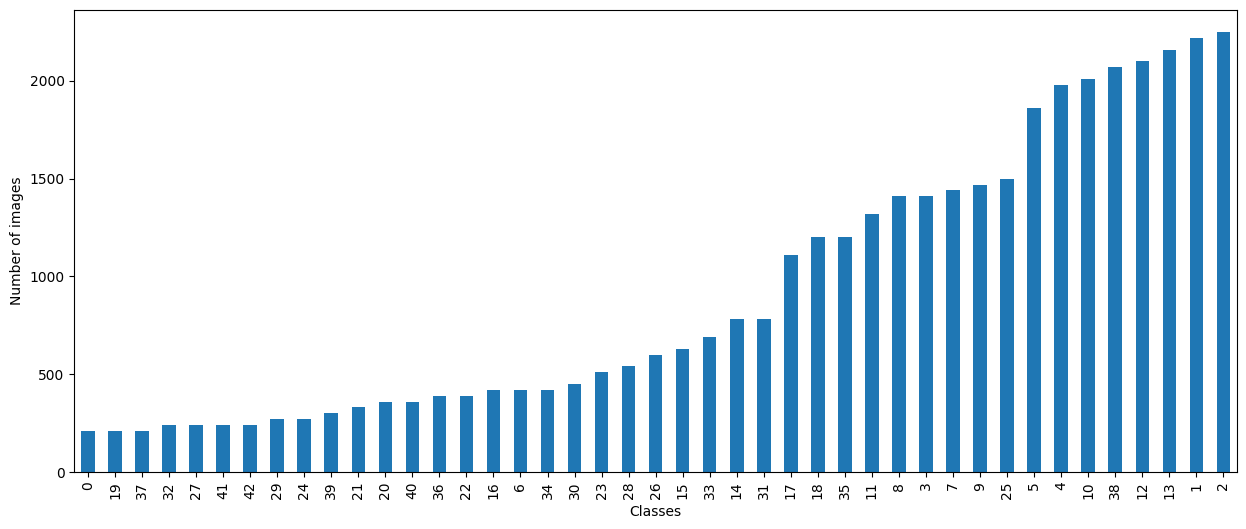

In [10]:
#Visualization number of images in each class in train data
currentpath = 'train'
data_dic = {}
for folder in os.listdir(currentpath):
    data_dic[folder] = len(os.listdir(currentpath + '/' + folder))

data_df= pd.Series(data_dic)
plt.figure(figsize = (15, 6))
data_df.sort_values().plot(kind = 'bar')
plt.xlabel('Classes')
plt.ylabel('Number of images')

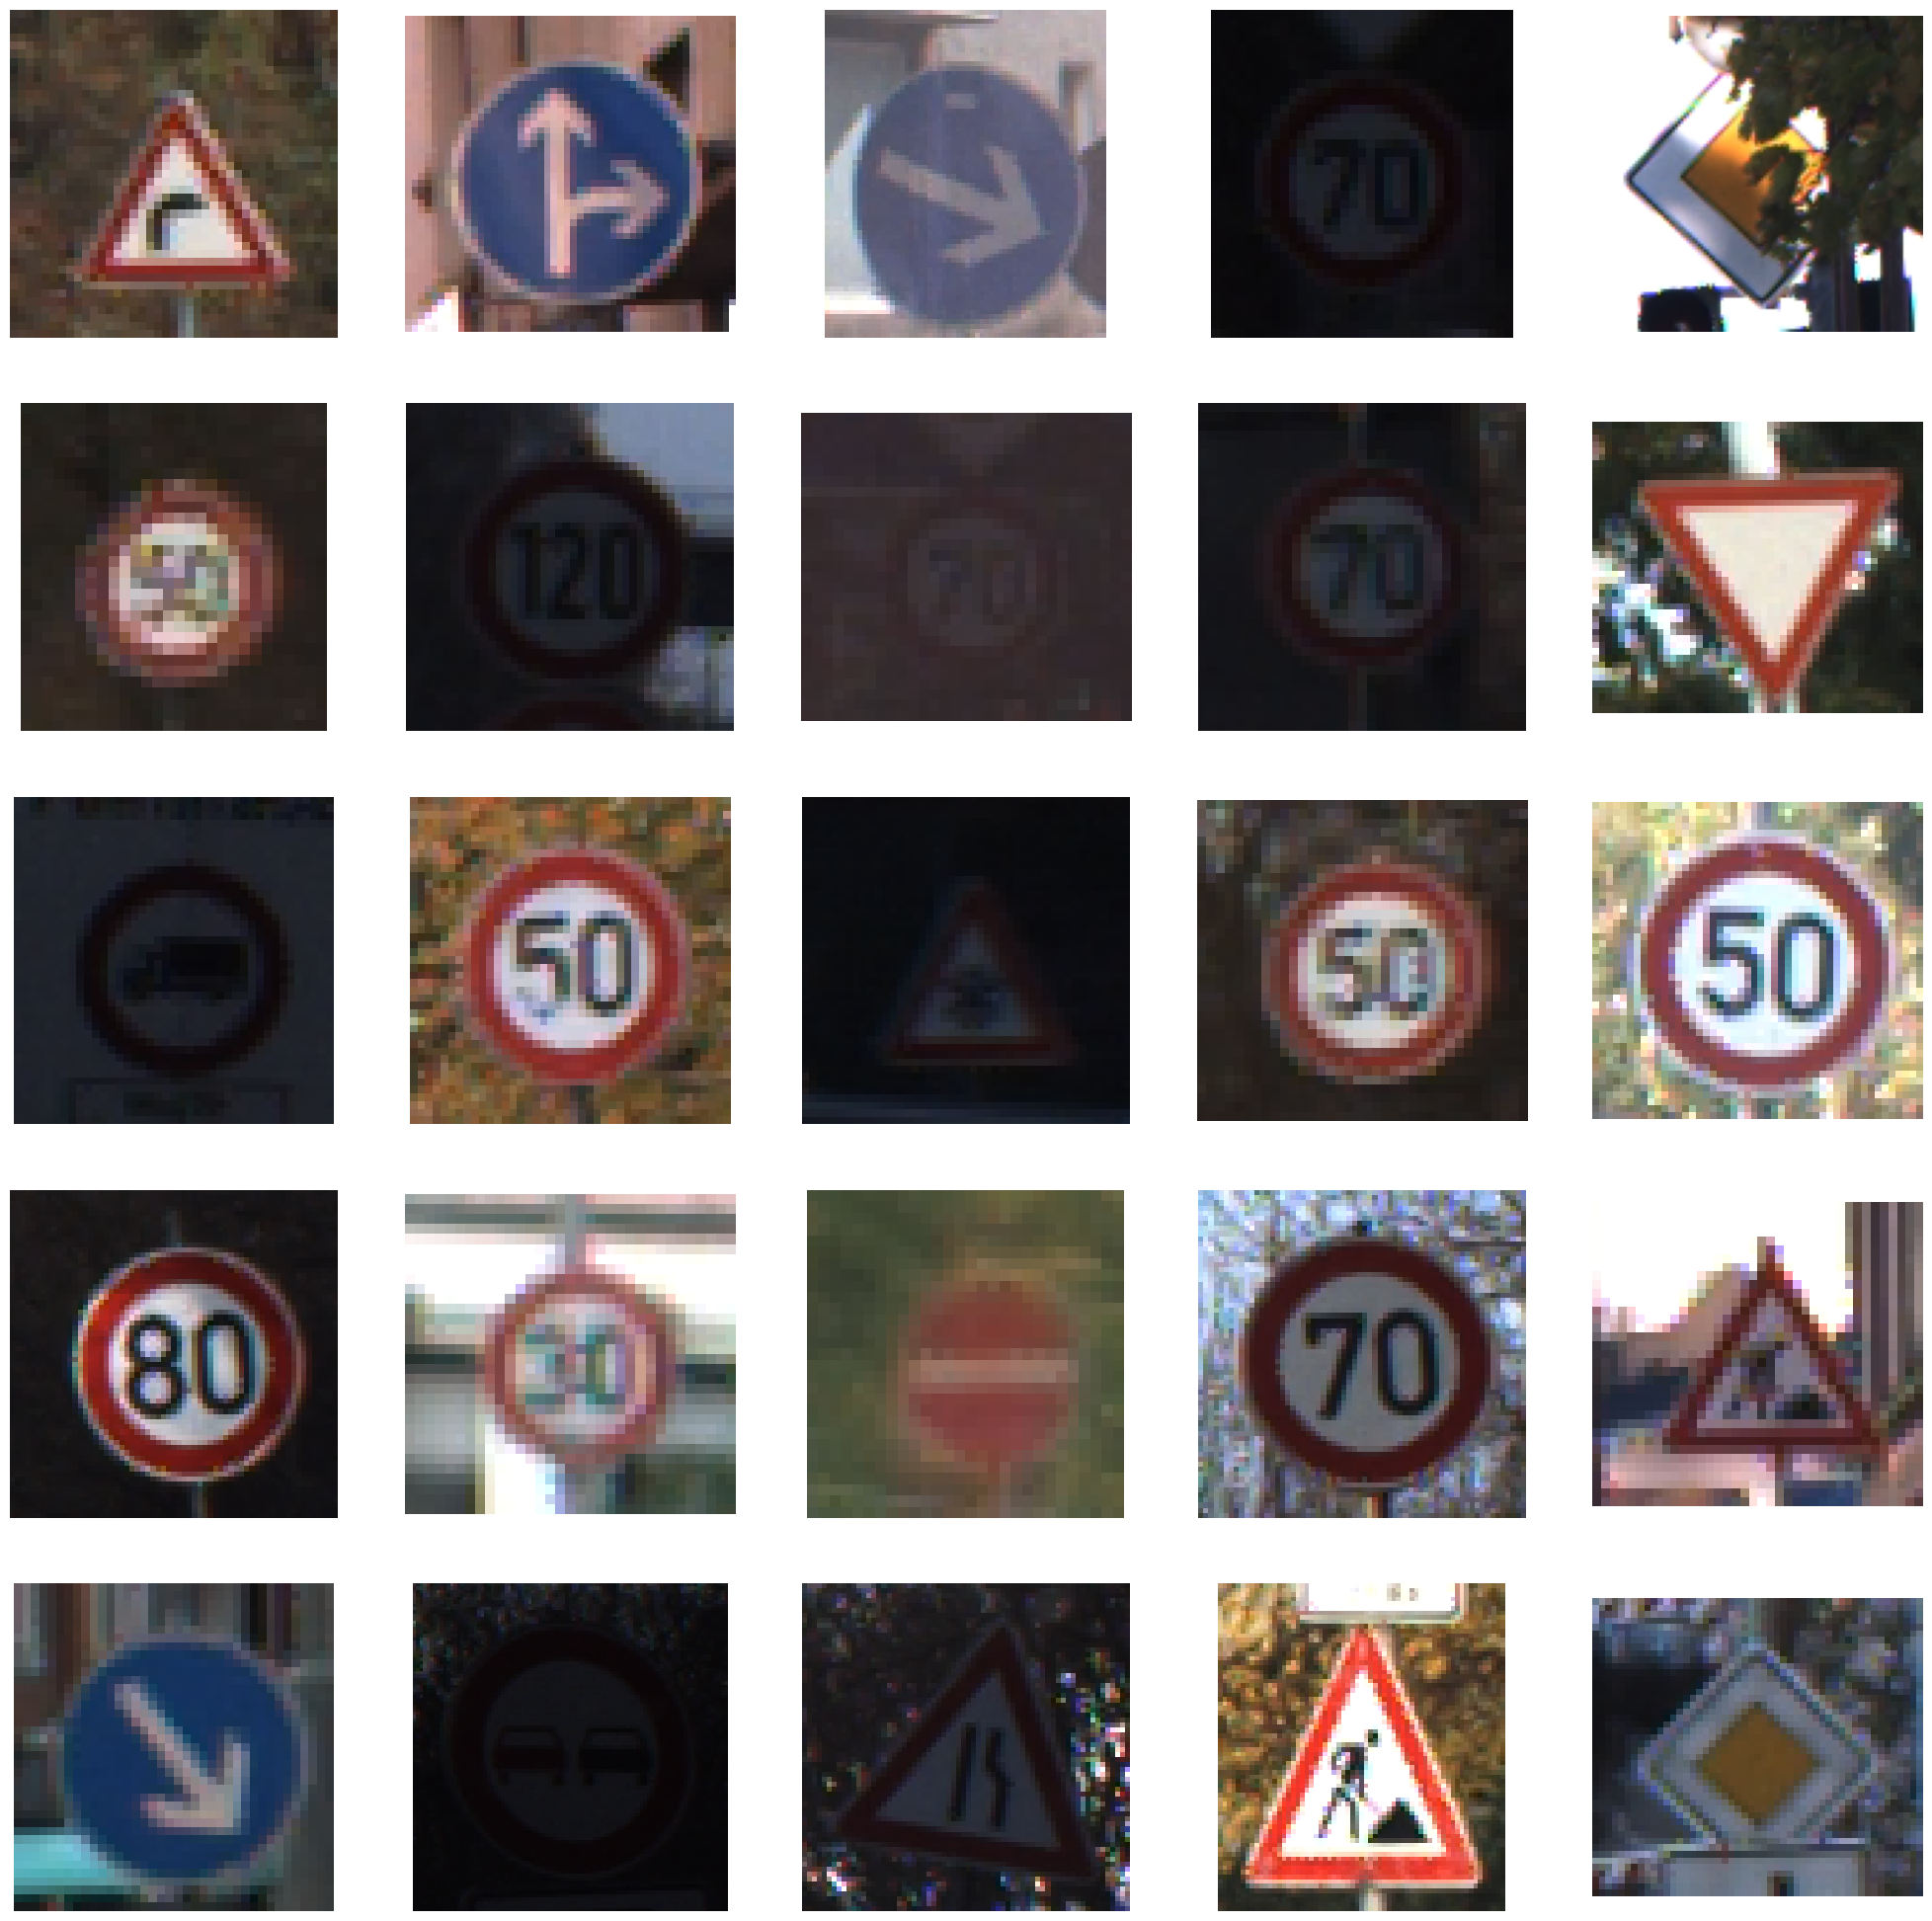

In [11]:
#Visualize the test data
test_data=pd.read_csv('Test.csv',usecols=['ClassId','Path','Width','Height'],)
test_data.rename({'ClassId':'label','Path':'path'},inplace=True,axis=1)
test_data.head(5)

import random
from matplotlib.image import imread
imgs=test_data['path'].values
plt.figure(figsize=(25,25))
for i in range(1,26):
    plt.subplot(5,5,i)
    random_image_path=random.choice(imgs)
    random_image=imread(random_image_path)
    plt.imshow(random_image)
   
    plt.axis('off')
    plt.xlabel(random_image.shape[0],fontsize=20)
    plt.ylabel(random_image.shape[0],fontsize=20)


In [20]:
#Modelling
model = Sequential()

model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(43, activation='softmax'))

In [21]:
#Model Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
# Train and Validate
history = model.fit(X_train, y_train, batch_size=64, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
491/491 [==============================] - 79s 152ms/step - loss: 2.9401 - accuracy: 0.3186 - val_loss: 1.2089 - val_accuracy: 0.7090
Epoch 2/15
491/491 [==============================] - 74s 151ms/step - loss: 1.2875 - accuracy: 0.6343 - val_loss: 0.5866 - val_accuracy: 0.8525
Epoch 3/15
491/491 [==============================] - 75s 152ms/step - loss: 0.8869 - accuracy: 0.7468 - val_loss: 0.4034 - val_accuracy: 0.8967
Epoch 4/15
491/491 [==============================] - 74s 151ms/step - loss: 0.6660 - accuracy: 0.8068 - val_loss: 0.2402 - val_accuracy: 0.9385
Epoch 5/15
491/491 [==============================] - 78s 159ms/step - loss: 0.4924 - accuracy: 0.8574 - val_loss: 0.1877 - val_accuracy: 0.9549
Epoch 6/15
491/491 [==============================] - 79s 161ms/step - loss: 0.4083 - accuracy: 0.8813 - val_loss: 0.1236 - val_accuracy: 0.9686
Epoch 7/15
491/491 [==============================] - 79s 160ms/step - loss: 0.3330 - accuracy: 0.9014 - val_loss: 0.1041 - val_ac

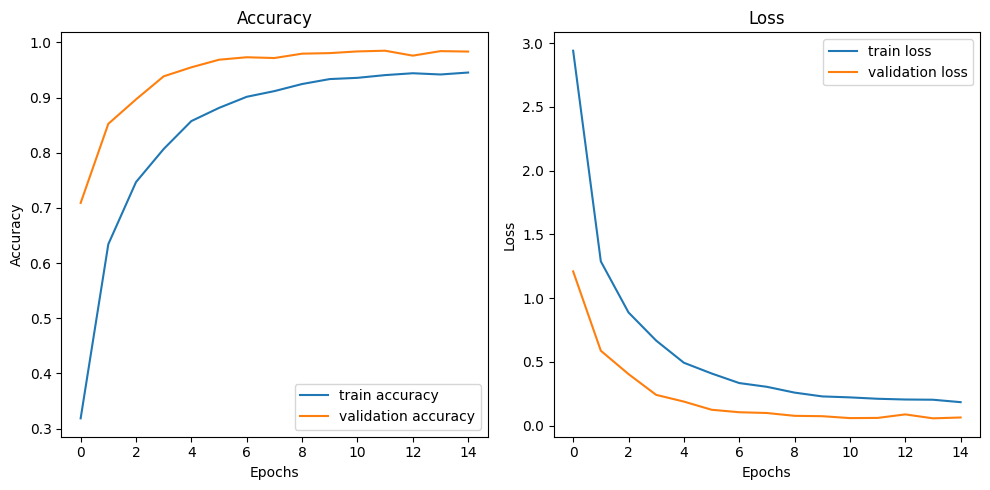

In [23]:
#Plot Results - train and validation 
# Figure size
plt.figure(figsize=(10, 5))
# Plot train and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# Plot loss and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [24]:
#Testing the model
y_test = pd.read_csv('Test.csv')
y_test.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [25]:
#Target Variable
labels = y_test['ClassId'].values

In [26]:
imgs = y_test['Path'].values

In [28]:
#Storing image data
data = []

In [29]:
for img in imgs:
    # Open image
    image = Image.open(img)
    # Resize to 30x30
    image = image.resize((30, 30))
    # Append in "data" list
    data.append(np.array(image))

In [30]:
# Convert "data" list to array
X_test = np.array(data)

In [31]:
# Make predictions
predict_x = model.predict(X_test)
classes_x = np.argmax(predict_x,axis=1)

395/395 [==============================] - 11s 19ms/step


In [33]:
from sklearn.metrics import accuracy_score

In [34]:
# Evaluate model
print('ACCURACY: {} %'.format(round(accuracy_score(labels, classes_x) * 100, 3)))

ACCURACY: 95.305 %


In [35]:
# Model
model.save('TrafficSign.h5')

### UI To Upload Image and Verify for  Testing Purpose - Later we implemented using Flask and ReactJs

In [10]:
# Libraries
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy
from keras.models import load_model
import numpy as np

In [11]:
# Load your model
model = load_model('TrafficSign.h5')

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [3]:
# Dictionary to label all traffic signs class.
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }

In [4]:
# Initialise GUI
top=tk.Tk()
# Window dimensions (800x600)
top.geometry('800x600')
# Window title
top.title('Traffic sign classification')
# Window background color
top.configure(background='#CDCDCD')
# Window label
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
# Sign image
sign_image = Label(top)

In [5]:
# Function to classify image
def classify(file_path):
    global label_packed
    # Open the image file path
    image = Image.open(file_path)
    # Resize the image
    image = image.resize((30,30))
    # Inserts a new axis that will appear at the axis position in the expanded array shape
    image = numpy.expand_dims(image, axis=0)
    # Convert to numpy array
    image = numpy.array(image)
    # Make prediction  
    pred = model.predict([image])[0]
    classes_x = np.argmax(pred)
    sign = classes[classes_x+1]
    print(sign)
    label.configure(foreground='#011638', text=sign) 

In [6]:
# Function to show the "classify" button
def show_classify_button(file_path):
    # Create the button
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
    # Configure button colors
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    # Configure button place (location)
    classify_b.place(relx=0.79,rely=0.46)

In [7]:
# Function to upload image
def upload_image():
    try:
        # Path of the image
        file_path=filedialog.askopenfilename()
        # Open file path
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass

In [8]:
# Create "Upload" button
upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)

# "Upload" button colors and font
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))

# Button location
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
# Window title text
heading = Label(top, text="Know Your Traffic Sign",pady=20, font=('arial',20,'bold'))
# Window colors
heading.configure(background='#CDCDCD',foreground='#364156')

In [9]:
heading.pack()
top.mainloop()

1/1 [==============================] - 0s 286ms/step
Ahead only
1/1 [==============================] - 0s 16ms/step
Road narrows on the right
1/1 [==============================] - 0s 32ms/step
Road work
1/1 [==============================] - 0s 19ms/step
Speed limit (30km/h)


###  Using VGG16 Pre-Trained Model

In [1]:
#Importing all  necessary Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading Dataset
# List to store image data
list_data = []
# List to store image labels (classes)
list_labels = []
# Number of classes
Noclasses = 43
# Current path of the dataset
currentpath = './'

In [3]:
#Loops 43 classes starting from 0 to 42
for i in range(Noclasses):
    #Passing Path of each image
    path = os.path.join(currentpath, 'train', str(i))
    images = os.listdir(path)
    #Loops between each image
    for a in images:
        #Exceptional Handlings
        try:
            #Open image
            image = Image.open(path + '/' + a)
            #(Image)Resizes to 50*50
            image = image.resize((50, 50))
            #Conversion of image into an array
            image = np.array(image)
            # Append the image to "data" list
            list_data.append(image)
            # Append the label to list
            list_labels.append(i)
        #error message
        except:
            print('Error loading images!')
#Lists into array
list_data = np.array(list_data)
list_labels = np.array(list_labels)
#Shape of images and labels lists
#Around 39K images of size 50*50 and data contains RGB Value
print(list_data.shape, list_labels.shape)

(39209, 50, 50, 3) (39209,)


In [4]:
#Splitting dataset into train and test (80:20)
X_train, X_test, y_train, y_test = train_test_split(list_data, list_labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 50, 50, 3) (7842, 50, 50, 3) (31367,) (7842,)


In [5]:
#Converting labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [6]:
model = Sequential()
model.add(VGG16(weights='imagenet', include_top=False, input_shape=X_train.shape[1:]))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dense(43, activation='softmax'))

#results(model)

In [7]:
adam = Adam(learning_rate=0.0001)

In [8]:
#Model Compile
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
# Train and Validate
history = model.fit(X_train, y_train, batch_size=64, epochs=2, validation_data=(X_test, y_test))

Epoch 1/2
491/491 [==============================] - 1453s 3s/step - loss: 1.8360 - accuracy: 0.5064 - val_loss: 1.0992 - val_accuracy: 0.7782
Epoch 2/2
491/491 [==============================] - 1459s 3s/step - loss: 0.1386 - accuracy: 0.9781 - val_loss: 0.0801 - val_accuracy: 0.9930


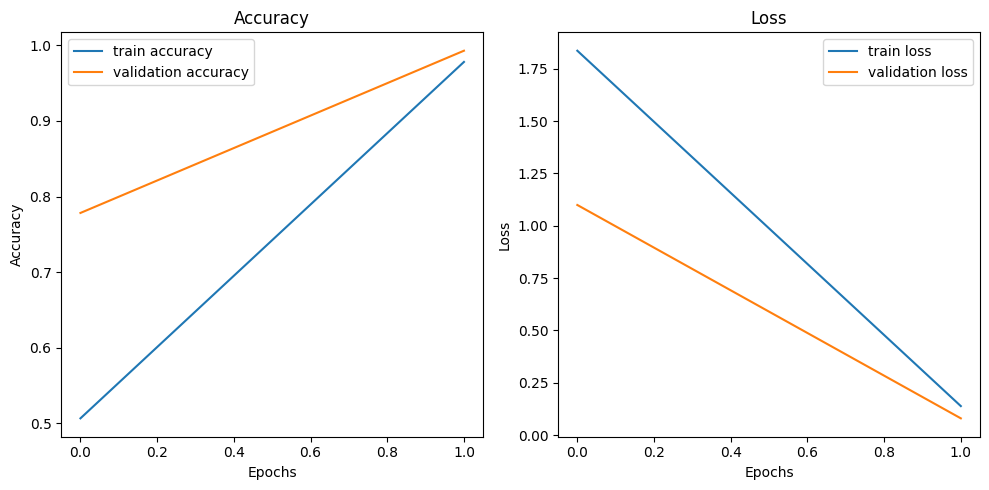

<Figure size 640x480 with 0 Axes>

In [26]:
#Plot Results - train and validation 
# Figure size
plt.figure(figsize=(10, 5))
# Plot train and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("Accuracy.png")
# Plot loss and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig("Loss.png")

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 batch_normalization (BatchN  (None, 1, 1, 512)        2048      
 ormalization)                                                   
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 1024)              525312    
                                                                 
 dense_1 (Dense)             (None, 43)                44075     
                                                        

In [12]:
model.save('TrafficSign_Vgg16.h5')

In [13]:
# Libraries
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy
from keras.models import load_model
import numpy as np

In [14]:
# Load your model
model = load_model('TrafficSign_Vgg16.h5')

In [15]:
#Testing the model
y_test = pd.read_csv('Test.csv')
y_test.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [16]:
labels = y_test['ClassId'].values

In [17]:
imgs = y_test['Path'].values

In [18]:
#Storing image data
data = []

In [19]:
for img in imgs:
    # Open image
    image = Image.open(img)
    # Resize to 50x50
    image = image.resize((50, 50))
    # Append in "data" list
    data.append(np.array(image))

In [20]:
# Convert "data" list to array
X_test = np.array(data)

In [21]:
# Make predictions
predict_x = model.predict(X_test)
classes_x = np.argmax(predict_x,axis=1)

395/395 [==============================] - 86s 210ms/step


In [24]:
print(classes_x)

[16  1 38 ...  6  7 10]


In [25]:
print(labels)

[16  1 38 ...  6  7 10]


In [22]:
from sklearn.metrics import accuracy_score

In [23]:
# Evaluate model
print('ACCURACY: {} %'.format(round(accuracy_score(labels, classes_x) * 100, 3)))

ACCURACY: 95.273 %
